# **Project 1 Report**

Vincent Ha

CS458

In [2]:
#importations used for code

from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd
from pandas.core.internals.blocks import F
from sklearn import datasets
from itertools import permutations
from operator import truediv


## **P1-1. Curse of Dimensionality**

**(a) Generate 1000 points following a uniform distribution under a given dimension, and then compute difference between max and min distance between any pair of points. Hint: Refer to the tutorial “Introduction to Numpy and Pandas” on how to generate random points.**

In [123]:
#code for p1-1a
random = np.random.rand(1000,2)
distances= []

for i in range(0, len(random)):
    for j in range(0, len(random)):
        if(i != j):
            distances.append(math.dist(random[i],random[j]))

print(max(distances))

1.3782115692837533


**(b) Repeat (a) for different dimensions from 2 to 50.**

(2.0, 50.0)

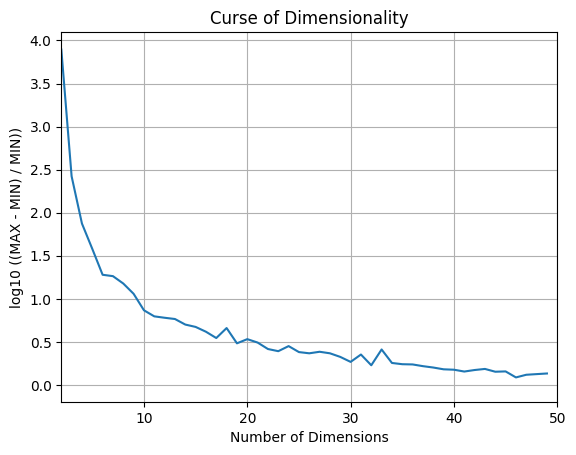

In [135]:
# Codes for P2-1(b)
import matplotlib.pyplot as plt
plotPoints = np.empty(shape=50, dtype=float)

for dimensions in range(2,50):
    distances= []
    random = np.random.rand(1000,dimensions)
    for i in range(0, len(random)):
        for j in range(0, len(random)):
            if(i != j):
                distances.append(math.dist(random[i],random[j]))
    plotPoints[dimensions] = (math.log10((max(distances) - min(distances))/ min(distances)))

plt.plot(plotPoints)
plt.title("Curse of Dimensionality")
plt.xlabel("Number of Dimensions")
plt.ylabel("log10 ((MAX - MIN) / MIN))")
plt.grid(True)
plt.xlim(2,50)

Plot log_10(max-min)/min under different number of dimensions. 

# **P1-2. The Iris Dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)**

**(a) Data Visualization. Duplicate the following figure using scatter plot.**

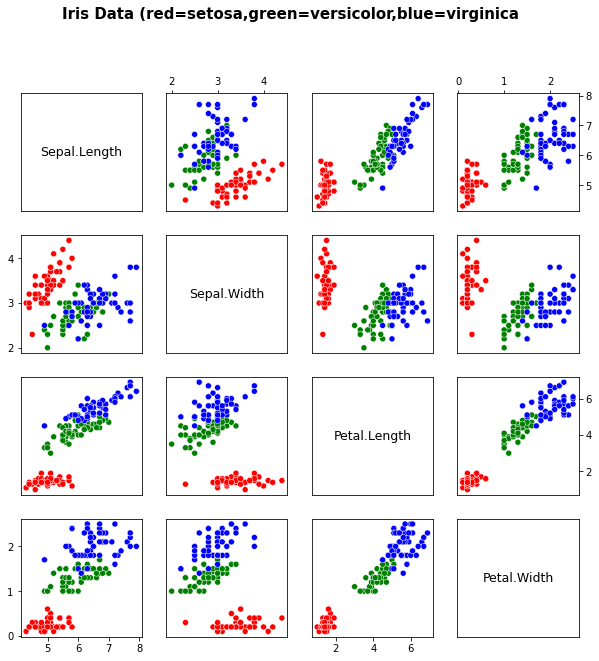

In [199]:
# Codes for P1-2(a)


iris_data = sns.load_dataset('iris')

fig, axs = plt.subplots(4,4, figsize = (10,10))
colors = ['red','green','blue']

plt.suptitle(x=.5,y=1,t='Iris Data (red=setosa,green=versicolor,blue=virginica',size=15,weight='bold')

currX, currY = '',''

for i in range (0,4):
  #determines x data
  if(i == 0):
    currY = 'sepal_length'
  if(i == 1):
    currY = 'sepal_width'
  if(i == 2):
    currY = 'petal_length'
  if(i == 3):
    currY = 'petal_width'

  for j in range (0,4):

    #x/y labels
    if(i==j):

      axs[i,j].xaxis.set_visible(False)
      axs[i,j].yaxis.set_visible(False)

      if(i==0):
        axs[i,j].text(.5,.5, 'Sepal.Length', fontsize=12.5, ha = 'center', va='center')
      if(i==1):
        axs[i,j].text(.5,.5, 'Sepal.Width', fontsize=12.5, ha = 'center', va='center')
      if(i==2):
        axs[i,j].text(.5,.5,'Petal.Length', fontsize=12.5, ha = 'center', va='center')
      if(i==3):
        axs[i,j].text(.5,.5, 'Petal.Width', fontsize=12.5, ha = 'center', va='center')
    else:
        #determines y data
      axs[i,j].xaxis.set_visible(False)
      axs[i,j].yaxis.set_visible(False)
      if(j == 0):
        currX = 'sepal_length'
        if(i == 1):
          axs[i,j].yaxis.set_visible(True)
        elif(i == 3):
          axs[i,j].xaxis.set_visible(True)
          axs[i,j].yaxis.set_visible(True)
      if(j == 1):
        currX = 'sepal_width'
        if(i == 0):
          axs[i,j].xaxis.set_visible(True)
          axs[i,j].xaxis.tick_top()
      if(j == 2):
        if(i == 3):
          axs[i,j].xaxis.set_visible(True)
        currX = 'petal_length'
      if(j == 3):
        currX = 'petal_width'
        if(i == 0):
          axs[i,j].yaxis.set_visible(True)
          axs[i,j].xaxis.set_visible(True)
          axs[i,j].xaxis.tick_top()
          axs[i,j].yaxis.tick_right()
        elif(i == 2):
          axs[i,j].yaxis.set_visible(True)
          axs[i,j].yaxis.tick_right()

      sns.scatterplot(data=iris_data, hue = 'species', x=currX, y=currY, ax=axs[i,j], legend = False, palette=sns.color_palette(colors))
      axs[i,j].set(xlabel=None)
      axs[i,j].set(ylabel=None)

**(b) Find the best discretization for the petal length and the petal width that can best separate the Iris data and plot a figure similar to the figure in slide 54 in Chapter 2. For each flower type, list in a table how many data samples are correctly separated and how many are not correctly separated.**

In [3]:
#code for P1-2b

flowerData = np.zeros((3,2),dtype=int)

iris_data = sns.load_dataset('iris')
colors = ['red','green','blue']
lenCat, lenInterval = pd.cut(iris_data['petal_length'], 3, retbins= True)
widCat, widInterval = pd.cut(iris_data['petal_width'], 3, retbins= True)

fig = sns.scatterplot(data=iris_data,x='petal_length',y='petal_width', palette = colors, hue = 'species', style = 'species')

for i in range(0,3):
    fig.hlines(widInterval[i], xmin=lenInterval[i], xmax=lenInterval[(i+1)], linestyles="--")
    fig.hlines(widInterval[i+1], xmin=lenInterval[i], xmax=lenInterval[(i+1)], linestyles="--")
    fig.vlines(lenInterval[i], ymin=widInterval[i], ymax= widInterval[i+1], linestyles="--")
    fig.vlines(lenInterval[i+1], ymin=widInterval[i], ymax= widInterval[i+1], linestyles="--")

size = iris_data.petal_length.size

for i in range(size):
    if(iris_data.species[i] == 'setosa'):
        if(iris_data.petal_length[i] >= lenInterval[0] and iris_data.petal_length[i] <= lenInterval[1]
        and iris_data.petal_width[i] >= widInterval[0] and iris_data.petal_width[i] <= widInterval[1]):
            flowerData[0][0] += 1
        else:
            flowerData[0][1] += 1
    elif(iris_data.species[i] == 'versicolor'):
        if(iris_data.petal_length[i] >= lenInterval[1] and iris_data.petal_length[i] <= lenInterval[2]
        and iris_data.petal_width[i] >= widInterval[1] and iris_data.petal_width[i] <= widInterval[2]):
            flowerData[1][0] += 1
        else:
            flowerData[1][1] += 1
    elif(iris_data.species[i] == 'virginica'):
        if(iris_data.petal_length[i] >= lenInterval[2] and iris_data.petal_length[i] <= lenInterval[3]
        and iris_data.petal_width[i] >= widInterval[2] and iris_data.petal_width[i] <= widInterval[3]):
            flowerData[2][0] += 1
        else:
            flowerData[2][1] += 1

rows = ('setosa', 'versicolor', 'virginica')
columns = ('correctly separated', 'incorrectly separated')
plt.table(cellText=flowerData,
          rowLabels=rows,
          colLabels = columns,
          loc='bottom',
          bbox = [0, -.7, 1, .3],
          cellLoc='center')
plt.subplots_adjust(left=.2,bottom=.4)

NameError: name 'pd' is not defined

By using the intervals from panda.cut, the data was categorized into three boxes. Each sample was checked by using these intervals and had it categorized on whether it fit or not. The interval cuts were also used in making the rectangle that contain samples in the graph. It can be determined that the discretization worked to a fairly accurate degree. The data between Versicolor and Virginica had some intertwining which caused the samples to fall out of their categories while Setosa was perfectly placed.

# **P1-3. Principal Component Analysis for The Iris Dataset**

**(a) Use the Iris dataset and plot all the samples in a figure using Sepal Length and Sepal Width, i.e., xlabel('Sepal length') and ylabel('Sepal width').**

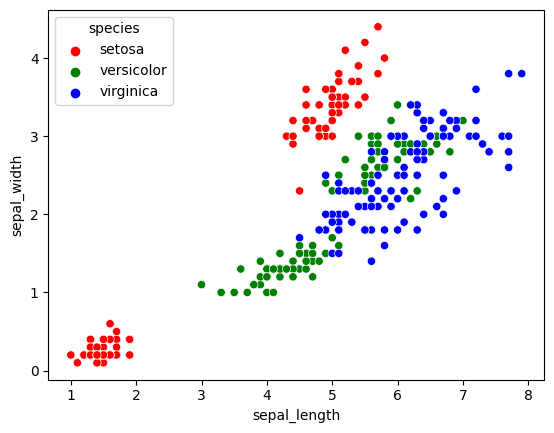

In [136]:
#code for P1-3(a)
iris_data = sns.load_dataset('iris')

colors = ['red','green','blue']


fig = sns.scatterplot(data=iris_data,x='sepal_length',y='sepal_width', hue='species',palette = colors)
fig = sns.scatterplot(data=iris_data,x='petal_length',y='petal_width', hue='species',palette = colors, legend=False)

**(b)The Iris dataset has 4 attributes (sepal length, sepal width, petal length, and petal width). Use PCA to reduce the dimension of the dataset from 4 to 2. Plot all the samples after the dimensionality reduction in a 2D figure. Compare this figure with the figure in (a) and discuss whether you can better separate the data samples after the dimensionality reduction.**

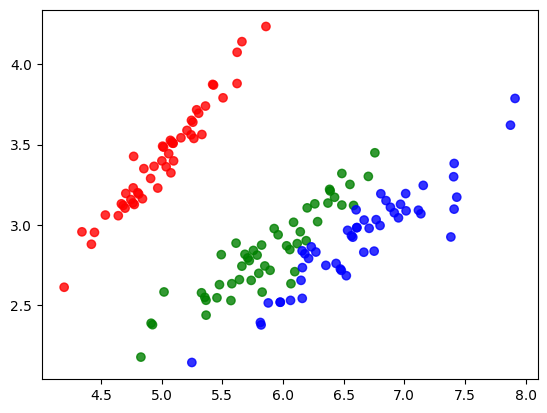

In [64]:
#Code for P1-3(b)


iris_data = datasets.load_iris()

pca = PCA(n_components=2)
pca.fit(iris_data.data)

colors = []

for i in iris_data.target:
    if (i == 0):
        colors.append('red')
    elif(i == 1):
        colors.append('green')
    elif(i == 2):
        colors.append('blue')
        
iris_pca = pca.transform(iris_data.data)
iris_new = pca.inverse_transform(iris_pca)
plt.scatter(iris_new[:, 0], iris_new[:, 1], alpha=0.8, color = colors)


Before the PCA, it was difficult to separate the data as they were identified by color using species. I wouldn't be able to reliable seperate the data that dealt with petals and the other ones that dealt with sepal. This was especially true for Virginica as it had data values that alligned with eachother. After the PCA, it was more identifiable which data group matched with which.